In [33]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE




In [34]:
train = pd.read_csv('train.csv.csv')


# Train Data

In [36]:
print("Number of Shape in Training Data:",train.shape)
print("Number of Duplicates in Training Data:",train.duplicated().sum())
print("Columns in training data:", train.columns)
print("Number of NUll values in each column:\n",train.isna().sum())

Number of Shape in Training Data: (58645, 13)
Number of Duplicates in Training Data: 0
Columns in training data: Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')
Number of NUll values in each column:
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [38]:
cat_columns = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
num_columns = ['id', 'person_age', 'person_income', 'person_emp_length',  'loan_amnt',
               'loan_int_rate', 'loan_percent_income',  'cb_person_cred_hist_length', 'loan_status']

In [39]:
print(train[cat_columns].apply(lambda col: col.nunique()))
train[cat_columns].apply(lambda col: col.unique())

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64


person_home_ownership                             [RENT, OWN, MORTGAGE, OTHER]
loan_intent                  [EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO...
loan_grade                                               [B, C, A, D, E, F, G]
cb_person_default_on_file                                               [N, Y]
dtype: object

In [40]:
# discription of numeric data
train.describe()


id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [41]:
train

id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICAL          C       4000          13.35   
2                    8.0    PERSONAL          A       6000           8.90   
3                   14.0     VENTURE          B      12000          11.11   
4                    2.0     MEDICAL          A       6000           6.92   
...                  ...         ...        ...        ...            ...   
58640                5.0   EDUCATION          D      25000          15.95   
58641                0.0     MEDICAL          C      10000          12.73   
58642                7.0   EDUCATION          D       6800          16.00   
58643                2.0   EDUCATION          A       5000           8.90   
58644                2.0     VENTURE          B      15000          11.11   

       loan_percent_income cb_person_default_on_file  \
0                     0.17                         N   
1                     0.07                         N   
2                     0.21                         N   
3                     0.17                         N   
4                     0.10                         N   
...                    ...                       ...   
58640                 0.21                         Y   
58641                 0.35                         N   
58642                 0.15                         N   
58643                 0.17                         N   
58644                 0.20                         N   

       cb_person_cred_hist_length  loan_status  
0                              14            0  
1                               2            0  
2                              10            0  
3                               5            0  
4                               3            0  
...                           ...          ...  
58640                          10            0  
58641                           8            1  
58642                           2            1  
58643                           3            0  
58644                           5            0  

[58645 rows x 13 columns]

In [42]:
# discription of non-numeric data
df_numeric = train.drop(cat_columns,axis=1)
train.describe(exclude='number')

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  58645       58645      58645                     58645
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   30594       12271      20984                     49943

# Data Distribution

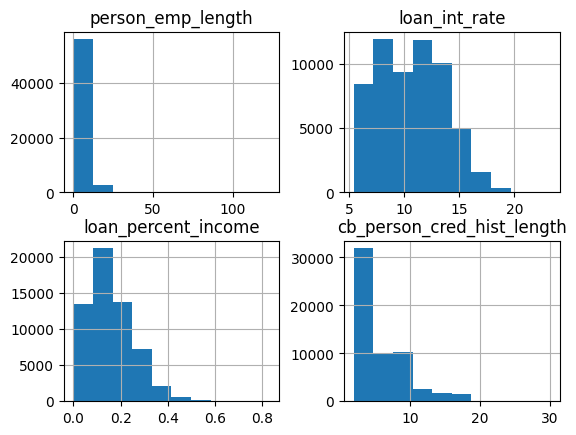

In [44]:
df_numeric[['person_emp_length', 'loan_int_rate', 'loan_percent_income',  'cb_person_cred_hist_length']].hist()
plt.show()

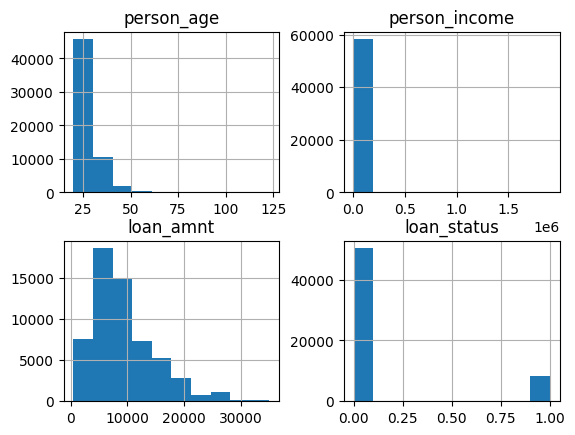

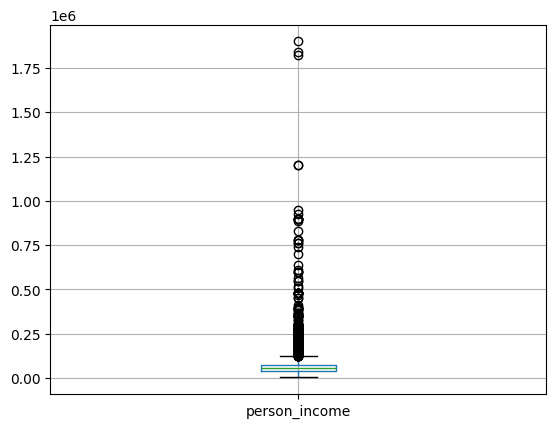

In [45]:
df_numeric[['person_age','person_income','loan_amnt','loan_status']].hist()
plt.show()
df_numeric[['person_income']].boxplot()
plt.show()

# correlation Matrix

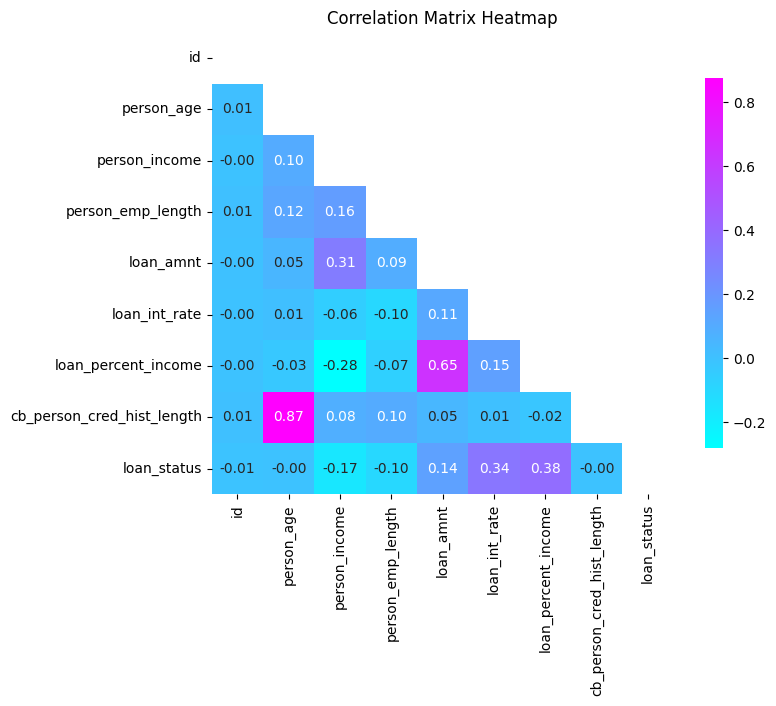

In [47]:
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True,cmap ='cool', fmt=".2f", square=True, cbar_kws={"shrink": .8}, mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Attribute Reduction

<Axes: >

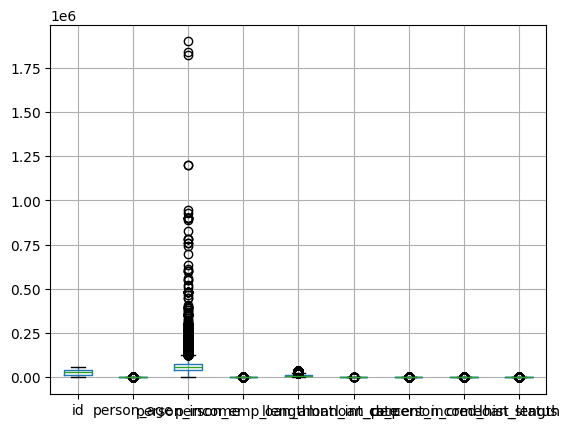

In [49]:
train.boxplot()

In [50]:

print(df_numeric.var())
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1)
sel.fit(df_numeric)
mask = sel.get_support()
mask

#reduced_df = head_df.loc[:, mask]

id                            2.866079e+08
person_age                    3.639969e+01
person_income                 1.438769e+09
person_emp_length             1.567989e+01
loan_amnt                     3.095595e+07
loan_int_rate                 9.209387e+00
loan_percent_income           8.407385e-03
cb_person_cred_hist_length    1.623442e+01
loan_status                   1.221115e-01
dtype: float64


array([ True,  True,  True,  True,  True,  True, False,  True, False])

In [51]:
df_numeric

id  person_age  person_income  person_emp_length  loan_amnt  \
0          0          37          35000                0.0       6000   
1          1          22          56000                6.0       4000   
2          2          29          28800                8.0       6000   
3          3          30          70000               14.0      12000   
4          4          22          60000                2.0       6000   
...      ...         ...            ...                ...        ...   
58640  58640          34         120000                5.0      25000   
58641  58641          28          28800                0.0      10000   
58642  58642          23          44000                7.0       6800   
58643  58643          22          30000                2.0       5000   
58644  58644          31          75000                2.0      15000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              11.49                 0.17                          14   
1              13.35                 0.07                           2   
2               8.90                 0.21                          10   
3              11.11                 0.17                           5   
4               6.92                 0.10                           3   
...              ...                  ...                         ...   
58640          15.95                 0.21                          10   
58641          12.73                 0.35                           8   
58642          16.00                 0.15                           2   
58643           8.90                 0.17                           3   
58644          11.11                 0.20                           5   

       loan_status  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
58640            0  
58641            1  
58642            1  
58643            0  
58644            0  

[58645 rows x 9 columns]

# log Transformation 

In [53]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
num_columns = [  'person_emp_length',  'loan_amnt',
               'loan_int_rate', 'loan_percent_income',  'cb_person_cred_hist_length']
transformed_data = pt.fit_transform(df_numeric[num_columns])
num_columns_l = [  'l_person_emp_length',  'l_loan_amnt',
               'l_loan_int_rate', 'l_loan_percent_income',  'l_cb_person_cred_hist_length']
df_transformed = pd.DataFrame(transformed_data, columns=num_columns_l)

In [54]:
df_transformed

l_person_emp_length  l_loan_amnt  l_loan_int_rate  \
0                -1.702447    -0.452643         0.330091   
1                 0.549678    -1.028188         0.894854   
2                 0.941428    -0.452643        -0.536468   
3                 1.828714     0.677032         0.209341   
4                -0.583852    -0.452643        -1.283848   
...                    ...          ...              ...   
58640             0.322781     2.107029         1.622867   
58641            -1.702447     0.360665         0.711150   
58642             0.754365    -0.262865         1.636265   
58643            -0.583852    -0.718674        -0.536468   
58644            -0.583852     1.084378         0.209341   

       l_loan_percent_income  l_cb_person_cred_hist_length  
0                   0.318329                      1.605735  
1                  -1.086262                     -1.447278  
2                   0.729385                      1.187521  
3                   0.318329                      0.162888  
4                  -0.596650                     -0.712463  
...                      ...                           ...  
58640               0.729385                      1.187521  
58641               1.741362                      0.881220  
58642               0.084983                     -1.447278  
58643               0.318329                     -0.712463  
58644               0.633004                      0.162888  

[58645 rows x 5 columns]

In [55]:
#df_transformed = pd.concat([df_transformed, train], axis=0)  # axis=0 for row-wise


##sns.pairplot(df_numeric)

In [56]:
#df_transformed

In [57]:

import numpy as np



X_subsample = train.sample(n=1000, random_state=42)
df_numeric = X_subsample.drop(cat_columns,axis=1)

df_numeric

# Initialize and fit Barnes-Hut t-SNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, method='barnes_hut', random_state=42)
tsne_features = tsne.fit_transform(df_numeric)
tsne_features



array([[-7.636724  , -8.206683  ,  1.1620593 ],
       [-0.0583157 ,  8.615514  , -0.44172436],
       [ 1.3384676 ,  4.2545414 ,  1.3879825 ],
       ...,
       [-4.0237675 , -2.3881004 , -0.81646705],
       [12.9991    ,  4.1582155 ,  0.27274087],
       [-6.1770973 , -0.9532397 , -0.52357346]], dtype=float32)

In [58]:
X_subsample['tsne_feature1'] = tsne_features[:, 0]
X_subsample['tsne_feature2'] = tsne_features[:, 1]
X_subsample['tsne_feature3'] = tsne_features[:, 2]








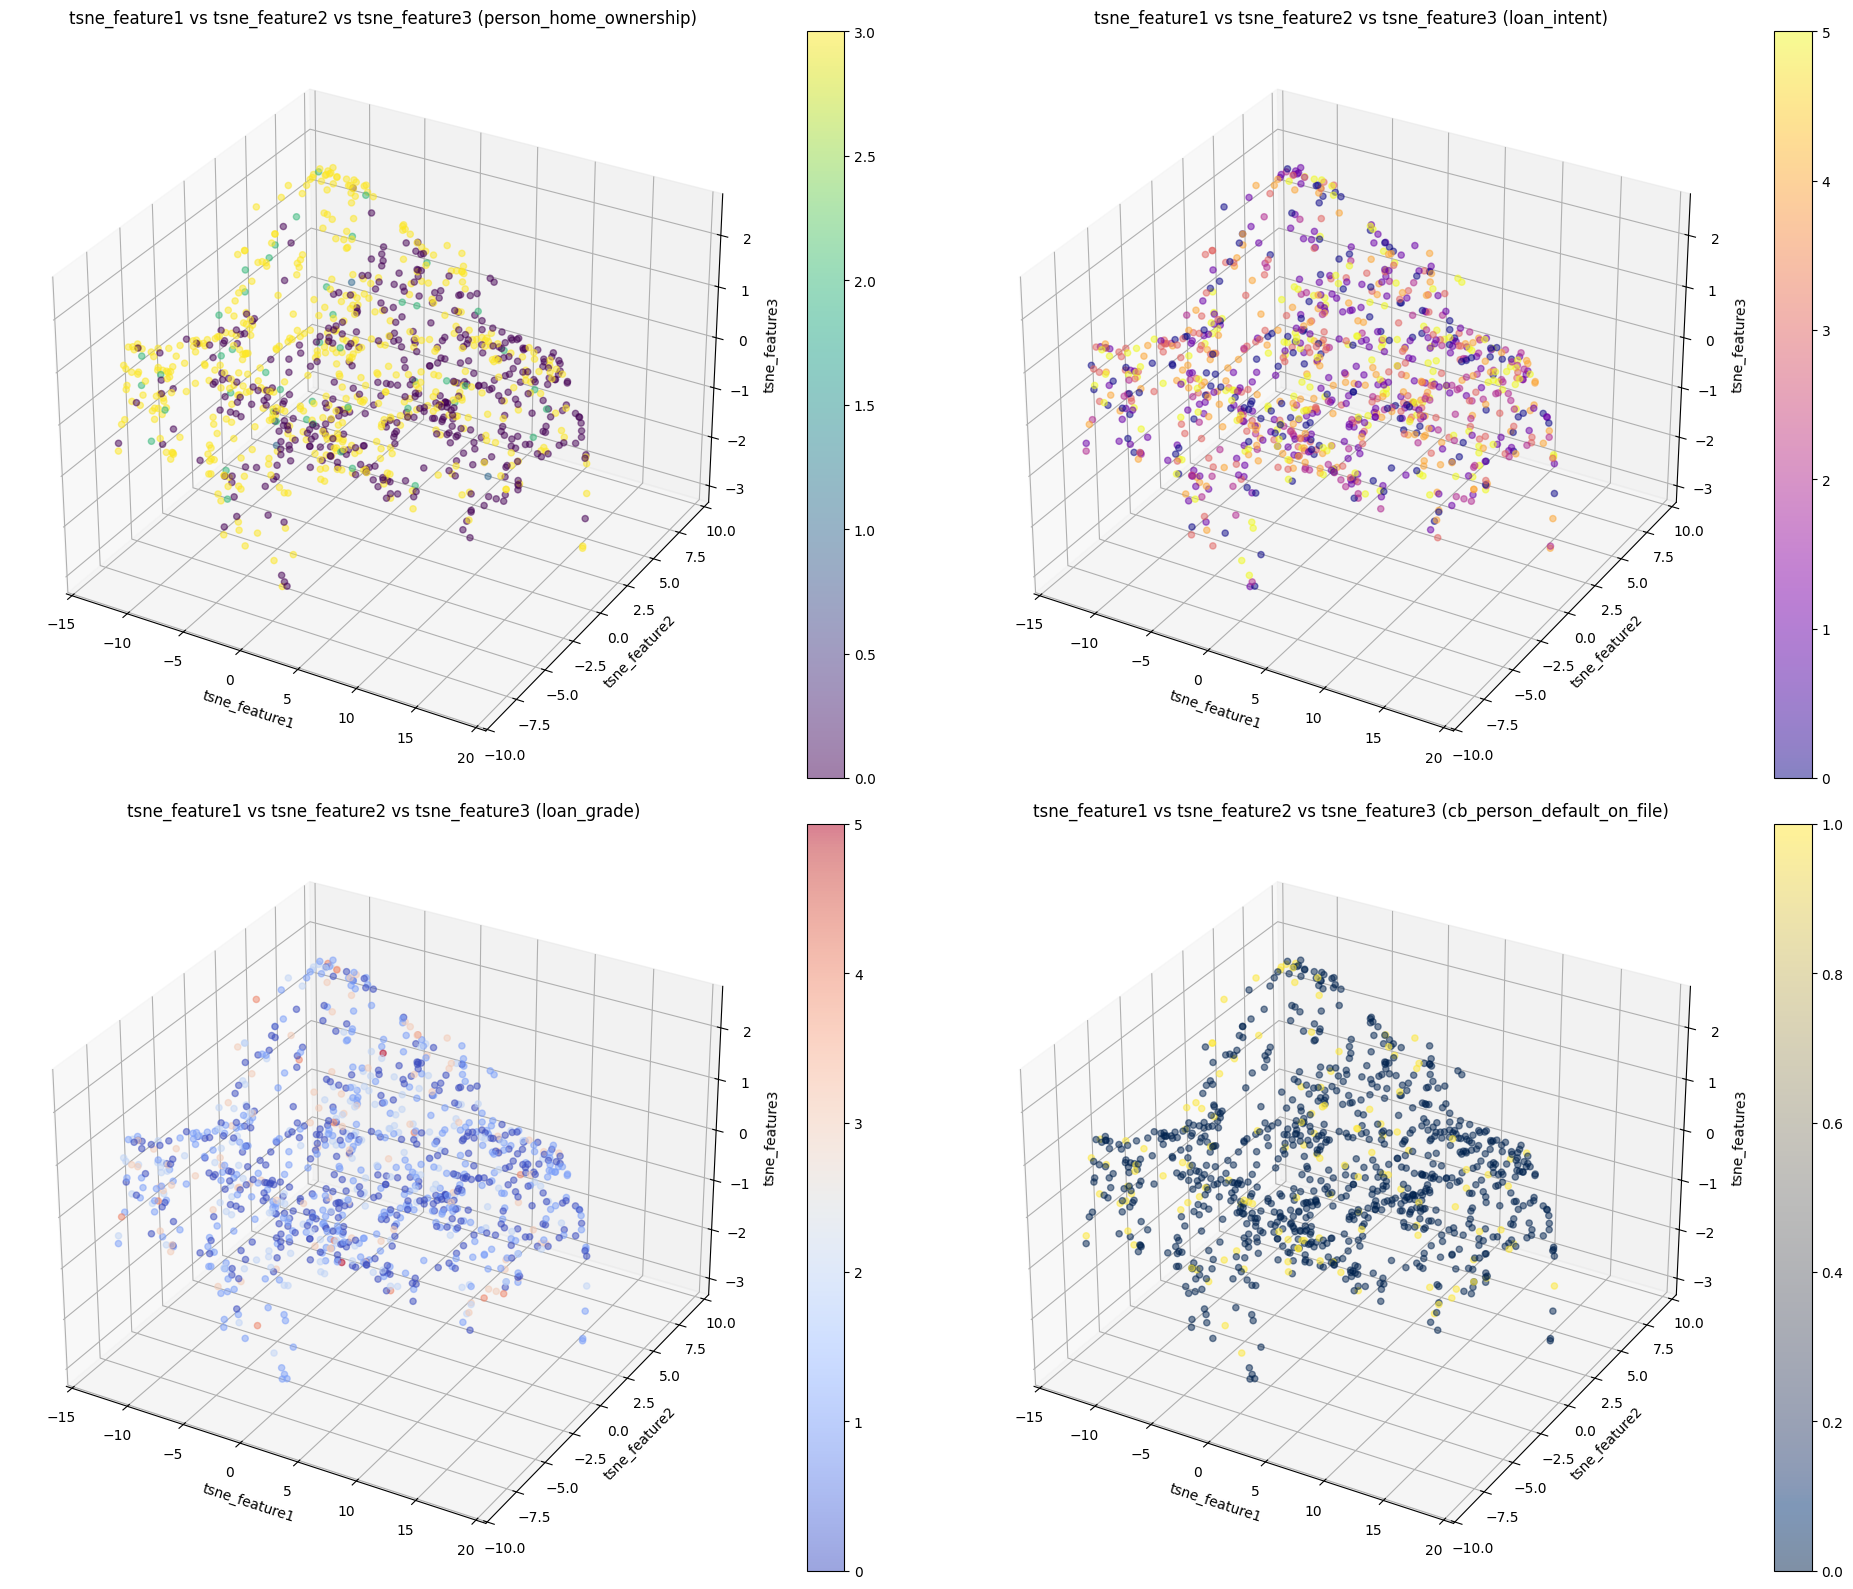

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables to integers for color mapping
label_encoders = {}
hue_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Create LabelEncoders for each hue variable to map categories to numbers
for col in hue_columns:
    label_encoders[col] = LabelEncoder()
    X_subsample[col] = label_encoders[col].fit_transform(X_subsample[col])

# Create subplots: 2 rows and 2 columns
fig = plt.figure(figsize=(20, 16))

# 1st subplot - hue='person_home_ownership'
ax1 = fig.add_subplot(221, projection='3d')
sc1 = ax1.scatter(X_subsample['tsne_feature1'], X_subsample['tsne_feature2'], X_subsample['tsne_feature3'], 
                  c=X_subsample['person_home_ownership'], cmap='viridis', alpha=0.5)
ax1.set_title('tsne_feature1 vs tsne_feature2 vs tsne_feature3 (person_home_ownership)')
ax1.set_xlabel('tsne_feature1')
ax1.set_ylabel('tsne_feature2')
ax1.set_zlabel('tsne_feature3')
fig.colorbar(sc1, ax=ax1)

# 2nd subplot - hue='loan_intent'
ax2 = fig.add_subplot(222, projection='3d')
sc2 = ax2.scatter(X_subsample['tsne_feature1'], X_subsample['tsne_feature2'], X_subsample['tsne_feature3'], 
                  c=X_subsample['loan_intent'], cmap='plasma', alpha=0.5)
ax2.set_title('tsne_feature1 vs tsne_feature2 vs tsne_feature3 (loan_intent)')
ax2.set_xlabel('tsne_feature1')
ax2.set_ylabel('tsne_feature2')
ax2.set_zlabel('tsne_feature3')
fig.colorbar(sc2, ax=ax2)

# 3rd subplot - hue='loan_grade'
ax3 = fig.add_subplot(223, projection='3d')
sc3 = ax3.scatter(X_subsample['tsne_feature1'], X_subsample['tsne_feature2'], X_subsample['tsne_feature3'], 
                  c=X_subsample['loan_grade'], cmap='coolwarm', alpha=0.5)
ax3.set_title('tsne_feature1 vs tsne_feature2 vs tsne_feature3 (loan_grade)')
ax3.set_xlabel('tsne_feature1')
ax3.set_ylabel('tsne_feature2')
ax3.set_zlabel('tsne_feature3')
fig.colorbar(sc3, ax=ax3)

# 4th subplot - hue='cb_person_default_on_file'
ax4 = fig.add_subplot(224, projection='3d')
sc4 = ax4.scatter(X_subsample['tsne_feature1'], X_subsample['tsne_feature2'], X_subsample['tsne_feature3'], 
                  c=X_subsample['cb_person_default_on_file'], cmap='cividis', alpha=0.5)
ax4.set_title('tsne_feature1 vs tsne_feature2 vs tsne_feature3 (cb_person_default_on_file)')
ax4.set_xlabel('tsne_feature1')
ax4.set_ylabel('tsne_feature2')
ax4.set_zlabel('tsne_feature3')
fig.colorbar(sc4, ax=ax4)

# Adjust layout
plt.tight_layout()
plt.show()





# Test Dataimport

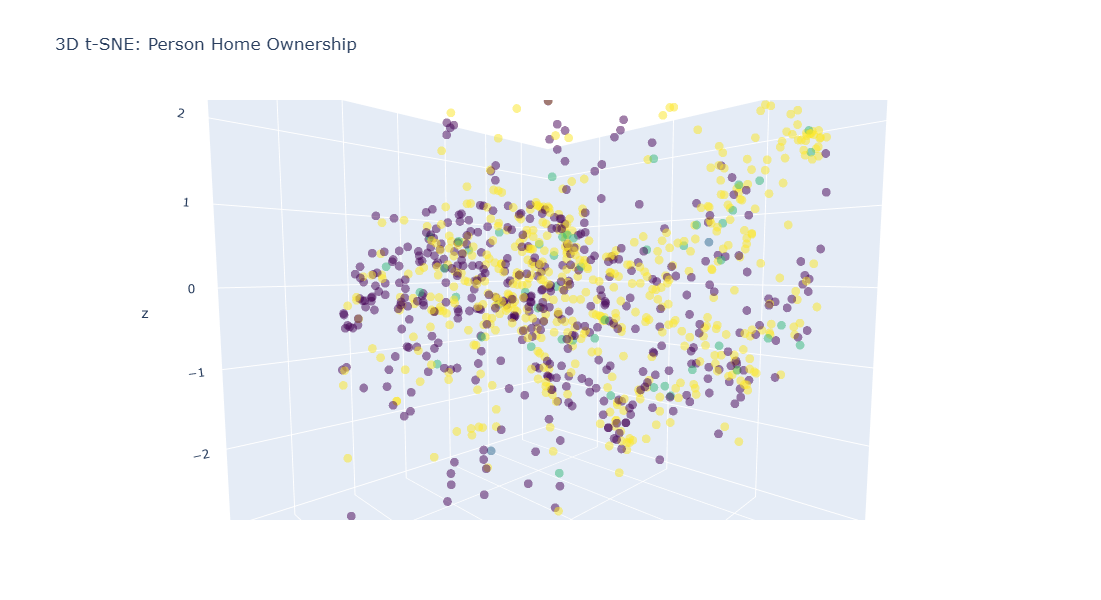

In [61]:
import plotly.graph_objs as go

# 1st plot - person_home_ownership
fig1 = go.Figure()

fig1.add_trace(go.Scatter3d(x=X_subsample['tsne_feature1'], y=X_subsample['tsne_feature2'], z=X_subsample['tsne_feature3'],
                           mode='markers', marker=dict(size=5, color=X_subsample['person_home_ownership'], colorscale='Viridis', opacity=0.5),
                           name='Person Home Ownership'))

# Update layout for better visualization
fig1.update_layout(title="3D t-SNE: Person Home Ownership", height=600, width=800)

# Show plot
fig1.show()


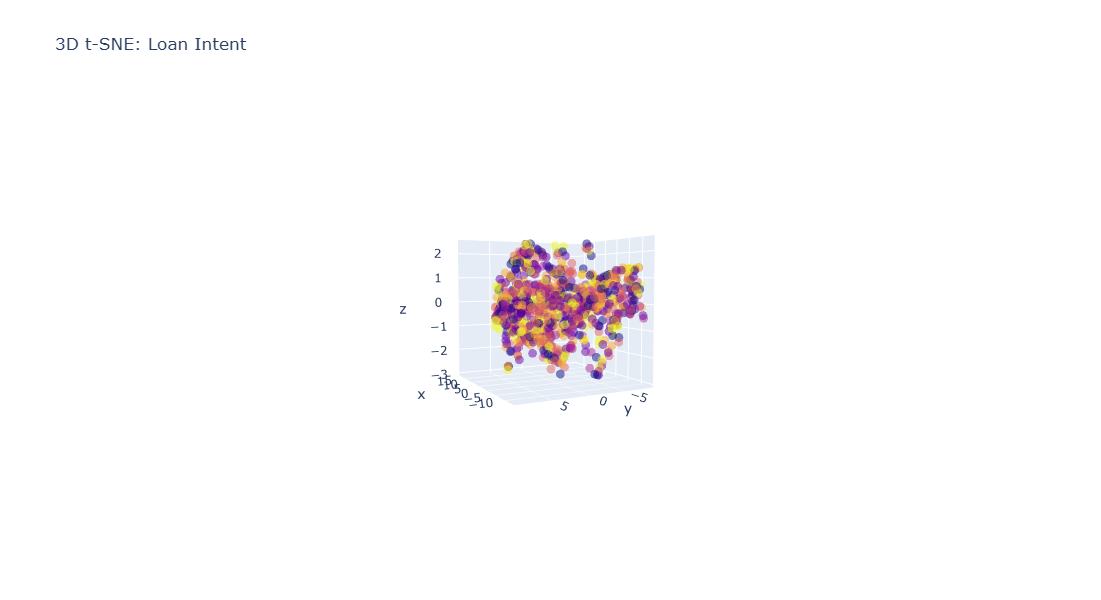

In [62]:
import plotly.graph_objs as go

# 2nd plot - loan_intent
fig2 = go.Figure()

fig2.add_trace(go.Scatter3d(x=X_subsample['tsne_feature1'], y=X_subsample['tsne_feature2'], z=X_subsample['tsne_feature3'],
                           mode='markers', marker=dict(size=5, color=X_subsample['loan_intent'], colorscale='Plasma', opacity=0.5),
                           name='Loan Intent'))

# Update layout for better visualization
fig2.update_layout(title="3D t-SNE: Loan Intent", height=600, width=800)

# Show plot
fig2.show()


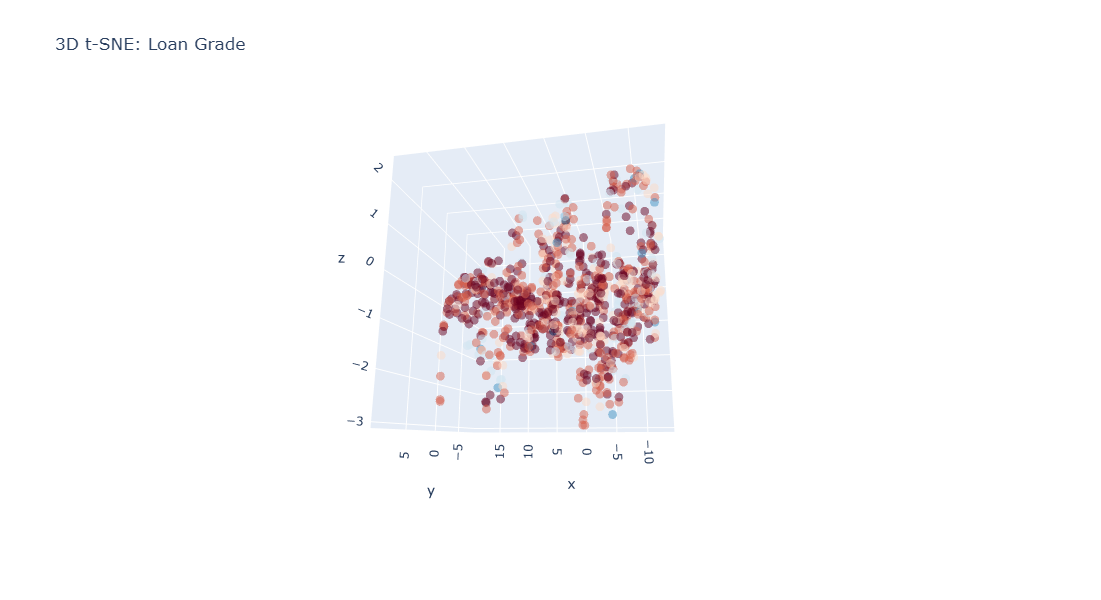

In [63]:
import plotly.graph_objs as go

# 3rd plot - loan_grade
fig3 = go.Figure()

fig3.add_trace(go.Scatter3d(x=X_subsample['tsne_feature1'], y=X_subsample['tsne_feature2'], z=X_subsample['tsne_feature3'],
                           mode='markers', marker=dict(size=5, color=X_subsample['loan_grade'], colorscale='RdBu', opacity=0.5),
                           name='Loan Grade'))

# Update layout for better visualization
fig3.update_layout(title="3D t-SNE: Loan Grade", height=600, width=800)

# Show plot
fig3.show()


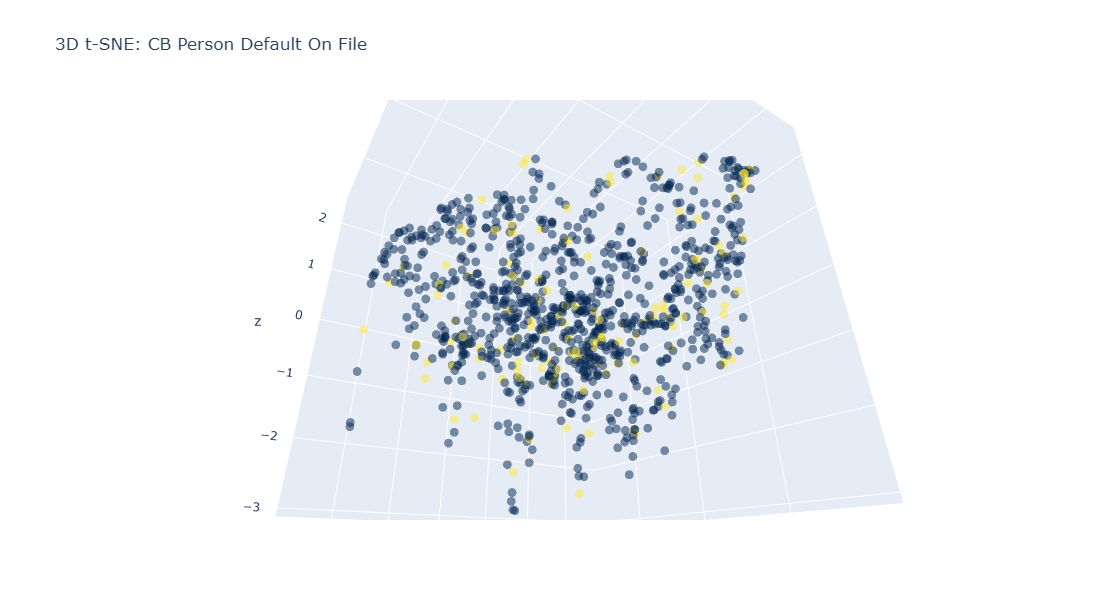

In [64]:
import plotly.graph_objs as go

# 4th plot - cb_person_default_on_file
fig4 = go.Figure()

fig4.add_trace(go.Scatter3d(x=X_subsample['tsne_feature1'], y=X_subsample['tsne_feature2'], z=X_subsample['tsne_feature3'],
                           mode='markers', marker=dict(size=5, color=X_subsample['cb_person_default_on_file'], colorscale='Cividis', opacity=0.5),
                           name='CB Person Default On File'))

# Update layout for better visualization
fig4.update_layout(title="3D t-SNE: CB Person Default On File", height=600, width=800)

# Show plot
fig4.show()


In [182]:
#! pip install tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense






from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [203]:

# Load dataset
data = pd.read_csv('train.csv.csv')

#data['person_emp_length'] = pt.fit_transform((data['person_emp_length']).values.reshape(-1, 1))
#data['loan_amnt'] = pt.fit_transform((data['loan_amnt']).values.reshape(-1, 1))
#data['loan_int_rate'] = pt.fit_transform((data['loan_percent_income']).values.reshape(-1, 1))
#data['loan_percent_income'] = pt.fit_transform((data['loan_percent_income']).values.reshape(-1, 1))

# Preprocess categorical variables using LabelEncoder
le = LabelEncoder()
data['person_home_ownership'] = le.fit_transform(data['person_home_ownership'])
data['loan_intent'] = le.fit_transform(data['loan_intent'])
data['loan_grade'] = le.fit_transform(data['loan_grade'])
data['cb_person_default_on_file'] = le.fit_transform(data['cb_person_default_on_file'])

# Split features and target
X = data.drop('loan_status', axis=1)
X = X.drop('person_age', axis=1)
y = data['loan_status']


In [205]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape

(46916, 11)

In [207]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Build the neural network model
#model = Sequential()
#model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")





C:\Users\jalle\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8706 - loss: 0.3403 - val_accuracy: 0.9116 - val_loss: 0.2419
Epoch 2/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9136 - loss: 0.2397 - val_accuracy: 0.9177 - val_loss: 0.2322
Epoch 3/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9175 - loss: 0.2339 - val_accuracy: 0.9209 - val_loss: 0.2232
Epoch 4/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9197 - loss: 0.2294 - val_accuracy: 0.9245 - val_loss: 0.2190
Epoch 5/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9206 - loss: 0.2247 - val_accuracy: 0.9255 - val_loss: 0.2164
Epoch 6/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9228 - loss: 0.2202 - val_accuracy: 0.9253 - val_loss: 0.2143
Epoch 7/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9264 - loss: 0.2158 - val_accuracy: 0.9251 - val_loss: 0.2134
Epoch 8/20
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9250 - loss: 0.2

In [208]:
test = pd.read_csv('test.csv.csv')
test.shape

(39098, 12)

In [209]:
#test['person_emp_length'] = pt.fit_transform((test['person_emp_length']).values.reshape(-1, 1))
#test['loan_amnt'] = pt.fit_transform((test['loan_amnt']).values.reshape(-1, 1))
#test['loan_int_rate'] = pt.fit_transform((test['loan_percent_income']).values.reshape(-1, 1))
#test['loan_percent_income'] = pt.fit_transform((test['loan_percent_income']).values.reshape(-1, 1))
test = test.drop('person_age', axis=1)
# Preprocess categorical variables using LabelEncoder
le = LabelEncoder()
test['person_home_ownership'] = le.fit_transform(test['person_home_ownership'])
test['loan_intent'] = le.fit_transform(test['loan_intent'])
test['loan_grade'] = le.fit_transform(test['loan_grade'])
test['cb_person_default_on_file'] = le.fit_transform(test['cb_person_default_on_file'])


scaler = StandardScaler()
test = scaler.fit_transform(test)


In [210]:
predictions = model.predict(test)
predictions = (predictions > 0.5).astype(int)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step


In [211]:
predictions = pd.DataFrame(predictions)

In [212]:



a = pd.read_csv('sample_submission.csv.csv')
file = pd.concat([a['id'],predictions],axis=1)
file.columns = ['id','loan_status']
file.to_csv('NN.csv',index=False)

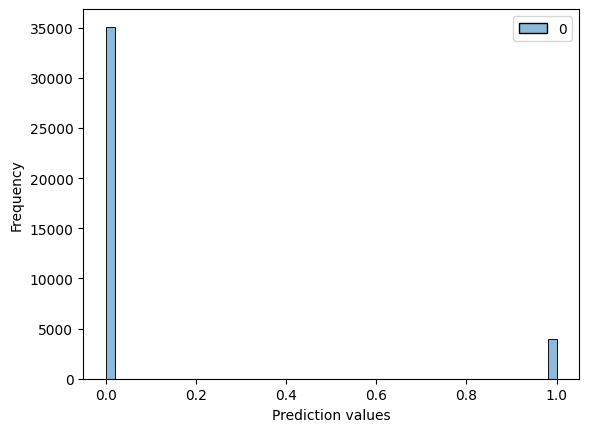

In [213]:


# Check the distribution of predictions
import seaborn as sns
sns.histplot(predictions, bins=50)  # Plot the predictions
plt.xlabel('Prediction values')
plt.ylabel('Frequency')
plt.show()
